## Convolutional Neural Network (CNN)

CNN ile resimleri sınıflandırmak için bir derin öğrenme yapılır.

Kullanacağımız veri seti içeriğinde 0'dan 9'a kadar elle yazılan rakamlar bulunmaktadır.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
# read train 
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Çıktıyı inceleyelim shape mtodu çıktısından anladığımız üzere, train setinde 42000 tane resim ve 785 tane column vardır. 785 tane column'un 28x28=784 dir ve 784 tanesi piksel ve 1 taneside label 'dır.  Resimler 28x28'lik matristir.

Label, resmin hangi class'a ait olduğunu ifade eder. 

label isimli feature'de resim üzerinde yazan sayı bilgileri bulunmaktadır. 

Bir resmin sayısal karşılığı pikseller ile ifade edilir. Renklerin matematikte bir karşılığı var ve bu karşılıklar pikseller ile ifade edilir.

train setinde bir label sütunu var ve bu sütunda resmin üzerinde yazan sayı bilgisi vardır. train setinde birde o resme ait pikseller bulunmaktadır.

In [3]:
# read test 
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


test setinde 28000 tane resim vardır. Test setinde hiçbir label yoktur. Çünkü amaç zaten bu set ile test işlemi yapmaktır.

Şimdi train setindeki label değerlerini ayıralım.

In [4]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

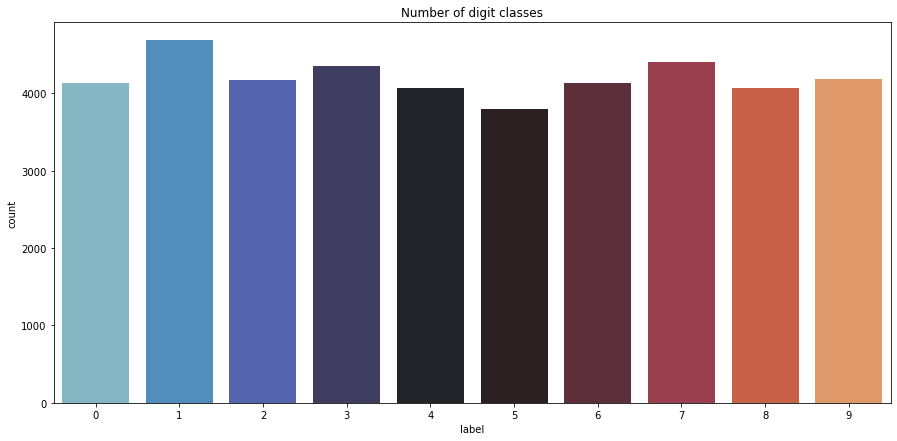

In [5]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(Y_train, palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

Şimdi data içerisinden rastgele seçtiğimiz resimleri çizdirelim.

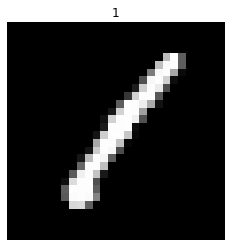

In [6]:
# plot some samples
img = [X_train.iloc[0]]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

img = [X_train.iloc[0]]

img = np.reshape(img,(28,28)) 

Bu satırlarda X_train'in 0. indeksindeki resim alınır ve matris haline getirilir.

img = img.reshape((28,28)) satırında 28x28'lık bir matris haline getirilir. Yani resme ait pikseller 28x28'lik bir matris içerisindedir.

plt.imshow(img, cmap='gray') satırında resmi temsil eden 28x28'lik matris parametre olarak verilmiştir ve ikinci parametre ile de resmin siyah beyaz görüntülenmesi sağlanmıştır.

plt.title(train.iloc[0,0]) satırında hangi sayıyı çizdirdiysek o sayıyı başlık olarak belirtiyoruz.

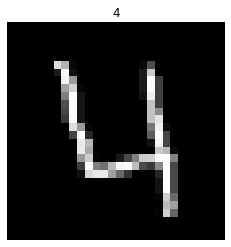

In [7]:
# plot some samples
img = [X_train.iloc[3]]
img = np.reshape(img,(28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

## Normalization - Reshape - Label Encoding

Neden normalizasyon yapıyoruz?: Eğer normalizasyon yapmaz isek farklı renklerden kaynaklı hatalar oluşabilir. Bu yüzden öncelikle normalizasyon yapıyoruz. Her bir rengin sayısal bir karşılığı vardır ve normalizasyon ile tüm bu değerler 0-1 aralığına taşınır. 

Bir resmi normalize etmek demek, resmi gray sacle'ye çevirmek demektir. Gray scale, siyah, beyaz, açık gri, koyu gri gibi renklerden oluşan 0-1 aralığında değerlere sahip resimlerdir. 

Normalizasyon işlemi CNN'in çalışmasını hızlandırır.

Resimler 28x28'liktir fakat 28x28x1 şeklinde 3D matrix yapmalıyız. Çünkü keras bu formatta çalışmaktadır. Keras'a 28x28 gibi 2 boyutlu resim verirsek keras onu anlamaz. 28x28x1 ifadesindeki 1, gray scale olduğu anlamına gelir. Eğer resim gray scale değilde renkli olsaydı 1 yerine rgb anlamına gelen 3 yazmalıydık.

0'dan 9'a kadar 10 farklı class vardır. Label encoding yapmalıyız. Label encoding, 9 tane 0 ve 1 değerlerini içerebilen array düşünün. Sayı ne ise o sayıdaki indekse 1 yazılır. Örnek verelim:

2 => [0,0,1,0,0,0,0,0,0,0]

Görüldüğü üzere label 2 sayısı olduğu için 2.indekse 1 yazılmıştır.

4 => [0,0,0,0,1,0,0,0,0,0]

Görüldüğü üzere label 4 sayısı olduğu için 4.indekse 1 yazılmıştır.

Bir resmin alabileceği maksimum matematiksel değer 255'tir dolayısıyla değerleri 255'e bölerek kabaca bir normalizasyon işlemi gerçekleştirebiliriz.

In [8]:
# Normalize the data

X_train = X_train / 255.0

test = test / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


reshape metodu ile 28,28,1 lik bir matrise çeviriyoruz. (42000, 28, 28, 1) çıktısı 4 boyutludur çünkü birde 42000 değeri ile kaç tane resim olduğu bilgisi bulunmaktadır.

Keras label encoding işlemi için bir metod sağlar.

In [10]:
# Label Encoding 
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

Yukarıdaki kod bloğu ile Y_train'deki data'yı 2 => [0,0,1,0,0,0,0,0,0,0] formatına dönüştürüyoruz. Böylece label encoding işlemi gerçekleştirilmiştir.

Şimdi data'yı train ve validation setlerine ayıralım.

In [11]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


train setleri ile model oluşturulur, validation setleri ile doğrulama yapılır ve en sonunda test ile gerçek testler yapılır. Test data'sı gerçek hayatta karşılaşabileceğimiz şeylerdir.

Gerçek hayat problemlerinde veri seti train ve test şeklinde bölünür ve test seti bir kenarda model hazır olduktan sonra test işlemi için kullanılmak üzere bekler. train data'sı train ve validation setlerine bölünür. train seti ile model oluşturulur, validation ile model test edilir ve model hazır olur. Sonrasında kenarda beklettiğimiz test data'sı ile modelin testi yapılır. Biz daha öncesinde veri setini train ve test olarak bölüp validation setine yer vermiyorduk. Gerçek hayatta ise işlemler validation seti de olmak üzere anlattığım kurgu şeklinde gerçekleştirilir.

## Convolutional Neural Network (CNN)

<br>
<img src="c1.png" style="width:880px;height:300px"/>

Input resimde 5 yazmakta fakat biz konunun daha iyi anlaşılabilmesi için input resmini kedi resmi olarak düşünelim. Bir kediyi sınıflandırabilmek için kediyi köpekten ayırt eden bazı özelliklere ihtiyaç vardır. Mesela kulaklarının sivriliği, gözünün büyüklüğü, kuyruğunun kıvrımı  gibi özelliklerin ayırt edilmesi lazım. Tam bu noktada filtre kavramıyla tanışacağız.

Filtre, bir resmin üzerine tutulduğu zaman o resimden belli şeyleri ayırt eden araçtır.


Öyle bir filtre olmalı ki, bu filtreyi kedi resminin üzerine tuttuğumuzda kedinin az önce bahsettiğimiz gibi özelliklerini ayırt edebilmeli. Görselde gördüğünüz Convolution Layer, bu filtre kısmıdır. Convolution layer'da feature map'ler vardır.

Pooling Layer katmanını açıklayalım. Pooling layer ile Convolution layer'ın yani bunu matrix olarak düşünebiliriz ve bu matrisin size'ı küçültülüyor. Kedinin kulağı elimizde mevcut. Ama koskoca bir kulağa ihtiyacımız yok. Mesela bu kulak 5x5'lik bir matristir. 5x5'lik matrisi tutmaktansa bu kulağın ortasındaki sayıyı tutuyoruz ya da maksimum sayısını tutuyoruz ve böylece bir kulak tek bir sayı ile ifade edilebilmiş oluyor. Bu durum hız sağlar.

Bu durum sayesinde overfitting yani data'yı aşırı ezberleme durumu engellenmiş oluyor. 

Sonra görselde gördüğümüz üzere convolutional layer vardır yani bir tur daha convolutional yapılmıştır. Genellikle ne kadar çok convolutional layer var ise o kadar iyi sınıflandırma yapabiliriz. Ama bu durum tabiki her data için geçerli değildir. 

Daha sonra yine pooling layer yapılıyor. Sonrasında flatten işlemi yapılıyor. Flatten şu idi: Mesela 3x3'lük matrisi 9x1'lik bir vektör haline çevirmektir. Matrisi ucundan tutup çekmek gibi düşünebiliriz. Bu işlemin yapılma sebebi, bu kısımda artificial neural network kullanılacaktır.

Görseldeki işlemler sırasıyla şu şekildedir: Filtreleme yapıldı (Convolution layer), eleme yapıldı ( Pooling layer), filtreleme yapıldı (Convolution layer), eleme yapıldı (Pooling layer) ve sonrasında artifical neural network kullanımına ihtiyaç var. Çünkü Dropout kısmında aslında feature'leri çıkarmış olduk. Kediyi sınıflandırmak için gerekli feature'leri çıkarıp flatten ettik yani düzleştirdik. Ve artificial neural network'te yaptığımız gibi flatten aşamasında belli inputlar var ve output ile sınıflandırma yapacağız.

CNN'in temel mantığı bu şekildedir.

Şimdi katmanları açıklayalım.

### Convolution layer

Bir resim ve 3x3 lük feature detector vardır.

Feature detector, resmi ayırt etmemizi sağlayacak (mesela kedinin gözü, köpeğin kuyruğu) feature'leri detect etmeye yani bulmaya yarayan matrislerdir. Bu matrisin boyutu hyperparameter'dir. Yani değeri seçilmelidir.

Feature detector, aynı zamanda kernel ve filtre olarakta adlandırılabilir. Filtre tabirini kullanmıştık. Bazı feature'ler vardıe. Bu feature'ler sınıfı classify etmeye yani ayırmaya yarıyor. Bu feature'leri kullanarak filtre yapacağız ve elimizde filtrelenmiş feature'ler olucak ve bu feature'leri kullanarak sınıflandırma yapacağız.

<font color = "DodgerBlue"><br>
Feature detector (filtre), kenarlar veya karmaşık şekiller gibi özellikleri algılar, tespit eder.

Feature map şudur: Bir resim ve feature detector var. Feature detector ile convolution yapıyoruz ve ortaya çıkan yeni feature'lere feature map denir.

<br>
<img src="c2.png" style="width:660px;height:300px"/>

3x3 lük matris filtredir ve 7x7 lik matris resimdir. Filtre resim üzerine konumlanır ve üst üste denk gelen piksel değerleri çarpılır. Elde edilen tüm çarpım sonuçları toplanır ve elde edilen sonuç convolution feature'sidir.

Stride, filtrenin resim üzerinde bir atlayarak kaymasıdır. O anki iterasyondaki üst üste binen tüm pikseller çarpılır ve tüm çarpımlar toplanarak sonuç matrisine elde edilen değer yazdırılır. Sonra filtre bir sağa kaydırılır ve oradaki üst üste binen tüm pikseller çarpılarak elde edilen sonuçlar toplanır. Yani stride filtrenin kayma adım sayısıdır. Stride=2 ise filtre 2 kutu sağa kayar.

Convolution yaptıktan sonra feature map yani output matrisi daha küçük bir boyuta sahip olacaktır. Böylece hız kazanılır. Aynı zamanda matrisin boyutu küçültüldüğünden bazı bilgiler kaybedilmiştir.

Köpeğin gözünü, kuyruğunu, kulağını vs. her bir özelliği farklı filtreler ile tespit edebiliriz. Dolayısıyla birden fazla feature map vardır.

<br>
<img src="c3.png" style="width:700px;height:200px"/>

Relu bir aktivasyon fonksiyonudur. Relu, nonlinearity durumunu arttırır. Yani karmaşıklığı arttırır. Resimlerde karmaşık yapılar olduğu için Relu kullanmak nonlinearity'i arttırır.

COnvolution layer ile bir feature map elde edilir ve sonra bu feature map'e Relu uygulanır. Böylece nonlinearity yani karmaşıklık artmış olur.

Yukarıdaki görselde de görebileceğimiz üzere Relu şöyle bir aktivasyon fonksiyonudur: Relu'ya giren input 0'dan küçük ise sonuç 0 'dır, Relu'ya giren input 0'dan büyük ise sonuç input değerinin aynısıdır. 

## Same padding

Convolutional layer'dan sonra oluşan feature map'in boyutu orjinal resimden küçüktür. Yani bu durumda veri kaybedilmiş oluyor. Veri kaybetmeyi önlemek için sampe padding yöntemi vardır.

Convolutional layer'dan sonra resim boyutu azalıyor. Bu durumda oluşan bilgi kaybını önlemek istiyoruz. Bu problemi önlemek için same padding kullanabiliriz. Same padding'ten farklı metodlarda vardır.

Resme same padding uygularsak, elde edilen matrisin boyutu ile orjinal resmin boyutu aynıdır. Boyutta bir değişiklik olmamaktadır.

<br>
<img src="c4.png" style="width:700px;height:200px"/>

Convolutional layer'dayız. Sarı matris filtredir. Yeşil kısım bir resim. Yeşil alanın etrafına bir çerçeve çiziyoruz. Bu çerçeveyide 0 değerleri ile dolduruyoruz. Sarı matrisi yanındaki matris üserinde dolaştırıyoruz. Eğer 0'lar olmasaydı sadece yeşil kısmın üzerinde filtreyi dolaştırsaydık, 5x5 lik matris üzerinde 3x3 lük filtre dolaşırsa 3x3 lük bir output matrisi elde etmiş olacaktık ve resme ait bilgi kaybı olacaktı. Bunu önlemek için yeşil kısmın çevresine 0 değerleri ile dolu bir çerçeve koyuyoruz. Matrisin bu halinde filtreyi dolaştırdığımızda 5x5 lik bir matris elde edilir. Böylelikle bilgi kaybını en aza indirmiş olduk. 

Çok fazla convolutional layer kullanılabiliyor. Eğer her convolutional layer kullandığımızda input'tan daha küçük bir boyutta output elde edilirse en sonunda çok küçük boyutta bir sonuç elde ederiz. Bunu önlemek ve bilgi kaybını da önlemek için same padding yöntemini kullanabiliriz.

## Max Pooling

<br>
<img src="c5.png" style="width:700px;height:200px"/>

<font color="red"><br>
It makes down-sampling or sub-sampling (Reduces the number of parameters)

Same padding ile bilgileri koruduk fakat yüksek boyut bir dezavantajdır çünkü yüksek boyut olması durumunda yavaş çalışma söz konusu olacaktır. Yavaş çalışma durumu istemediğiz bir durumdur dolayısıyla down-sampling uygularız. Bu max pooling'in yaptığı bir şeydir. Mesela resimlerde sağa bakan kedi, sola bakan kedi, yatan kedi gibi farklılıkların sınıflandırmayı etkilememesi için max pooling yapılır. 

Ayrıca overfitting durumunu engellemek içinde pooling yapıyoruz. 

Pooling işlemi şöyle yapılır:  

Yukarıda gördüğünüz matristeki sayılar resmi ifade etmekte. Bu matrise 2x2 lik max pooling uygulayalım. 2x2 lik matrisi 6x6 lık matris üzerine koyuyoruz ve o alan içerisindeki maksimum değeri output'a yazıyoruz. Sonrasındaki 2x2 lik matrisi sağa kaydırıp aynı işlemleri gerçekleştiriyoruz.

## Flattening

<br>
<img src="c6.png" style="width:500px;height:200px"/>

Flattening yönteminin numpy kütüphanesinde metodu vardır. Matrisi uzatmak gibi düşünelim ve flattening işlemi sonucu vektör elde edilir.

Artificial neural network'e input olarak flattening işleminde elde edilen sonuç verilir.

Fully connected layer, artificial neural network olucak. Buranın input'uda flattening olucak.

## Fully Connected

Fully connected, classification yaptığımız sigmoid aktivasyon fonksiyonunu içeren artificial neural network kısmıdır. 

<br>
<img src="c7.png" style="width:600px;height:200px"/>

Fully Connected'ın bir tanımı var: Neural network'te her bir node'yi bir sonraki node'ye bağlamak zorunda değiliz. Fully Connected'da ise node'ler birbirlerine full bağlıdır. Yukarıdaki dizayn bildiğimiz artifial neural network'tür. 

<br>
<img src="c1.png" style="width:880px;height:300px"/>

Birde feature map kavramını örnekle açıklamak istiyorum. Yukarıdaki görseli takip edelim. Resim convolution layer katmanından geçtikten sonra feature map'ler elde edilir. Feature map'ler küçük basit şekillerdir. Mesela bir kedi resmi için feature map, kedinin kuyruğunun uzun kenarı olabilir, kedinin kuyruğunun sivri ucu olabilir, kedinin kulağının sivri ucu olabilir. Çünkü ilk başta önemli feature'leri tespit edemiyoruz, yavaş yavaş daha derinlere iniyoruz. Sonrasında pooling layer'a gelindi. Pooling işlemi gerçekleştirildi. Sonrasında convolution layer'a gelindi. Pooling'ten çıkanlara convolution layer uygulandı ve bu sefer biraz daha ayrıntılı şeyler görülmeye başlandı. Mesela artık feature map'te kedinin tüm kuyruğu vardır. Böylelikle feature map'te öğrendiklerimiz giderek ayrıntılı hale gelmiştir. Sonrasında yeni feature map'lerede pooling yapıldı. Artık elimizde feature'ler var ve bu feature'ler ANN'e verilir. Sonrasında resmin kedi mi köpek mi olduğu outputta söylenir.

Burada öğrenilen 2 şey vardır. Birincisi ANN'de öğrenilen weight ve bias değerleridir. Dİğeri ise convolution kısmında filtreler öğrenilmektedir.

## CNN Implementing with Keras

### Create Model

<font color="DeepPink"><br>
Model şu şekilde olacaktır:
<font color="DeepPink"><br>
conv => max pool => dropout => conv => max pool => dropout => fully connected (2 hidden layers)

Dropout: Bir tane neural network vardır. Bir kez forward propagation yapılıyor. Forward propagation yaparken random bir şekilde seçtiğimiz nöronları devre dışı bırakıyoruz. Devre dışı bıraktığımızda diğer nöronlar ile bunlar arasında ir bağlantı kalmıyor.

<br>
<img src="c8.png" style="width:580px;height:300px"/>

Yukarıda görüldüğü üzere neural net'te normal şartlar altında birbirine bağlı olan nöronlar, applying dropout'ta görüldüğü üzere nöron dropout metodu uygulanarak devre dışı bırakıldığı için artık nöronlar birbirlerine bağlı değillerdir.

<font color="Tomato"><br>
Dropout metodu, nöronları devre dışı bırakma işlemidir. Nöronlar threshold değerine göre devre dışı bırakılır. Mesela threshold değeri 5 ise, 5 değerinin üstünde ise nöron devre dışı bırakılır, 5 sayısının altında ise devre dışı bırakılmaz. 
<font color="Tomato"><br>
Dropout metodu overfitting durumunu engellemek için, çeşitliliği artırmak için kullanışlı bşr metottur. 

In [12]:
#keras kütüphanesine ait kullanacağımız metodlar:

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [13]:
model = Sequential()

Yukarıda bir model oluşturduk. Sequential() 'ı bir yapı, model oluşturmak olarak düşünün. Öyle bir yapı ki içerisinde layer'ları barındırmaktadır. Yani aslında 

<br>
<img src="c1.png" align="left" style="width:600px;height:200px"/>

Bu yapı modeldir. Bu yapının içerisine layer'ları sırasıyla ekleyeceğiz.

In [14]:
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
    
Bu satırda, filters parametresi ile feature tespiti yapan filtre sayısı belirlenir. Burada 8 seçilmesi sebebi, filtrenin az olması sağlanarak hız kazanılmasıdır. kernel_size = (5,5) ile filtrelerin boyutu belirlenir. 8 tane 5x5'lik filtre matrisi oluşturulmuştur. padding='Same' ile Same yönteminin kullanılması sağlanmıştır. Aktivasyon fonksiyonu olarak relu seçilmiştir. input 28x28'lik matrislerdir ve keras (28,28,1) şeklinde sonda 1 sayısını eklememizi ister. Bu 1 değeri gray scale olduğunu ifade eder.

<font color="DeepPink"><br>
conv => max pool => dropout => conv => max pool => dropout => fully connected (2 hidden layers)
    
Modelimiz pembe sıralamadadır. Dolayısıyla sırada max pooling eklenmelidir. pool size 2x2 olarak belirlenmiştir.
    
model.add(Dropout(0.25))
    
Bu satırda random'luk 0.25 olarak belirlenmiştir. %25 node'yi deactivate et ya da etme demektir. Sonrasında tekrar convolution layer oluşturuluyor. Burada input_shape belirlemeye gerek yoktur. Çünkü katmanlar birbiri arkasına ekli oldukları için artık 
    
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu')) 
 
bu satırdaki convolution bir önceki gelen inputu biliyor. İlk convolution layer'ın önünde bir model olmadığı için başlangıç input_shape değerinin verilmesi gerekmektedir.
    
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    
Bu satırda, strides=(2,2) parametresi pooling'i ya da convolution'u gezdirirken kaç basamak atlayarak gezeceğimizin bilgisini tutar. Burada 2 basamak atlanarak hareket edilmektedir.
    
Sonrasında fully connected layer'dayız. fully connected yaparken öncelikle flatten yapacağız ve daha sonrada layer'ları ekleyeceğiz. 
    
model.add(Flatten()) satırı ile flatten işlemi yapılmıştır.
    
model.add(Dense(256, activation = "relu")) satırında aktivasyon fonksiyonu relu olan bir tane hidden layer eklenmektedir.
    
model.add(Dense(10, activation = "softmax")) satırında bir tanede output değeri eklenmiştir.
    
Yani toplamda 2 tane layer eklenmiştir. Burada softmax fonksiyonu kullanılmıştır. Bunun sebebi, softmax'in sigmoid'in daha genelleştirilmiş hali olmasıdır. Sigmoid'de 2 tane yani binary classification için kullanıyorduk. Softmax'i ise binary değilde multi output classification için kullanabiliriz.
  
<font color="LimeGreen"><br>
Yani binary fazla sınıflandırma söz konusu ise sigmoid, 2'den daha fazla sayıda class'ı sınıflandırma söz konusu ise softmax kullanılabilir.
    
Böylece model yapısı oluşturulmuştur. Bu modele bir şeyler öğretmek istiyoruz ve bu işlemi optimizer ile gerçekleştirebiliriz. 

## Adam Optimizer

Learning rate normal şartlar altında sabittir. Adam optimizer'ı kullanırsak learning rate'i değiştirebiliriz.

In [15]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

beta_1 ve beta_2 learning rate'in değişimini etkileyen parametrelerdir. Adam optimizer, learning rate'i değiştirerek daha hızlı öğrenmeyi sağlıyor. Eğer learning rate değeri küçük ise ve cost'u minimum yapacak parametrelere hızlı bir şekilde gidilemiyorsa learning rate'i adam optimizer artırıyor. Eğer tam tersi ise yani çok hızlı gidiliyorsa learning rate'i azaltır. Adam optimizer, bu şekilde bir ayarlama yapar.

## Compiler

Burada modeli compiler edicez. Yani parçaları birleştireceğiz. Ama bundan önce loss fonksiyonu hatırlayalım.

Loss function, artificial neural network'ten bildiğimiz bir hata oranıdır. Hata çok ise wegiht'ler update edilir. Bu işlem hata minimum noktaya inene kadar yapılır.

categorical crossentropy kullanacağız. categorical crossentropy'in binary cross entropy'den farkı, binary'de class 2 tanedir ve categorical'da 2'den fazladır.

<br>
<img src="c9.png" style="width:600px;height:100px"/>

Yukarıdaki formül sonucunda elde edilen bilgi, eğer doğru predict edildiyse hata 0, eğer yanlış predict edildiyse hata yüksektir.

Şimdi modele compile kısmını ekleyelim.

In [16]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

optimizer'ı, loss function'u ve metrics'i parametre olarak belirledik. Elde edilen sonuç accuracy'e göre değerlendirilecektir.

## Epochs and Batch Size

Veri setinde 10 tane resim olduğunu düşünelim. batch size değerini 2 olarak belirledik. Her seferinde forward ve backward propagation yapıyorduk ve bunun yerine bu işlemleri her seferinde 2 resimle yapacağız. 2 resimle forward, 2 resimle backward yapılır. İlk adımdan sonra 8 resim kalır. Yani 10/2=5 kez forward-backward işlemi yapılır. Dolayısıyla 5 kez batches yapmış oluyoruz. Bir tane batch yapmak için gerekli olan size 2'dir. Her bir batch'de 2 kez yapılıyorsa ve 10 tane resim var ise, 5 kez batch yapılmış olur. 10 tane resmi 5 kez batches yaptığımızda hepsini forward ve backward propagation yapmış oluyoruz ve  buda 1 epoch olarak adlandırılır. Yani her epoch'da 5 kez batches yapılmaktadır.

Mesela 3 tane epoch yapmak istersek 3x5=15 kez batch yapılır. 

In [17]:
epochs = 10 
batch_size = 250

## Data Augmentation

Overfitting'i önlemek için farklı boyuttaki, farklı rotasyondaki, farklı veri setlerini kedni veri setimize eklememiz lazım. Bu yüzden training data'sında küçük değişiklikler yapıyoruz ve bu değişiklikler sayesinde gerçek resmimize benzeyen resimler üretiyoruz. Aşağıdaki şekilde görüldüğü gibi resme zoom yapıyoruz, yan çeviriyoruz vs. 

<br>
<img src="c10.png" style="width:600px;height:300px"/>

Yukarıdaki şekilde görüldüğü gibi farklı farklı küçük değişiklikler yaparak overfitting önlenebilir ve 6 yazısının farklı halleri sayesinde syaının 6 olduğu anlaşılabilir.

Şimdi bu işlemi gerçekleştiren metodu yazalım.

In [18]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

## Fit the Model

Artık modeli fit edebiliriz. Yani artık modeli oluşturup train edebiliriz.

In [19]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 39s 247ms/step - loss: 1.1658 - accuracy: 0.6081 - val_loss: 0.2750 - val_accuracy: 0.9345
Epoch 2/10
151/151 [==============================] - 35s 230ms/step - loss: 0.4777 - accuracy: 0.8498 - val_loss: 0.1420 - val_accuracy: 0.9593
Epoch 3/10
151/151 [==============================] - 35s 232ms/step - loss: 0.3453 - accuracy: 0.8907 - val_loss: 0.1096 - val_accuracy: 0.9660
Epoch 4/10
151/151 [==============================] - 35s 230ms/step - loss: 0.2854 - accuracy: 0.9103 - val_loss: 0.0985 - val_accuracy: 0.9707
Epoch 5/10
151/151 [==============================] - 35s 229ms/step - loss: 0.2497 - accuracy: 0.9214 - val_loss: 0.0862 - val_accuracy: 0.9740
Epoch 6/10
151/151 [==============================] - 36s 235ms/step - loss: 0.2231 - accuracy: 0.9316 - val_loss: 0.0747 - val_accuracy: 0.9779
Epoch 7/10
151/151 [==============================] - 36s 238ms/step - loss: 0.2062 - accuracy: 0.9359 - val_loss: 0.0698 - val_ac

## Evaluate the Model

Loss fonksiyonunun nasıl değiştiğine bakalım.

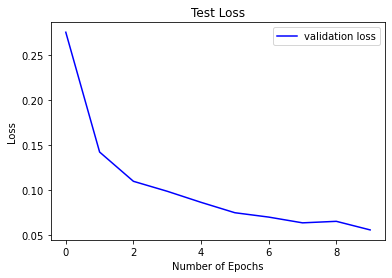

In [20]:
#Plot the loss and accuracy curves for training and validation
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Yukarıda validation'a ait loss grafiğini görmekteyiz. Epoch sayısı artırıldığında loss'daki azalmada devam edecektir.

132/132 [==============================] - 1s 8ms/step


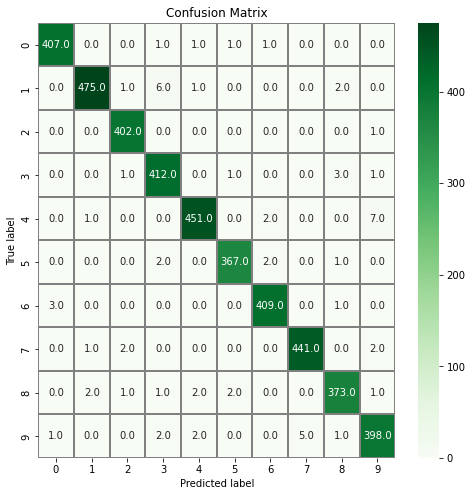

In [21]:
#confusion matrix
import seaborn as sns
#Predict the values from the validation dataset
Y_pred = model.predict(X_val)
#Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
#Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis=1)
#compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
#plot the confusion matrix
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

Y_pred_classes = np.argmax(Y_pred, axis=1) satırında; Y_pred'in indekslerini Y_pred_classes'a eşitliyoruz.

Çıktıyı inceleyelim. Mesela ilk hücreye bakalım. Gerçekten 0 sayısı test edilmiş ve 0 prediction'u yapmış. Mesela True label'da 4'e bakıldığında geerçek değer 4 ve 451 tanesini doğru bir şekilde predict etmiştir. Mesela True label değeri 9 ama predict değeri 0 olan 1 tane değer var.